In [8]:
import geopandas as gpd
import pandas as pd

In [9]:
mun_obr_all_bad = gpd.read_file('data/mun_obr_all_bad.geojson')
data = mun_obr_all_bad
data.head(3)

,id,name,type,level,sub,region,people,sum_bad,percent,road_density,road_demand,id_full,count_bad,avg_free_speed_to_limit,sum_all,sum_all_signal,geometry
0,1,Приморский,Район,3,3,Архангельская область,25639,454.179,22.587524,0.039698,7817,191.0,1276,0.540127,4566.956058,2010.751573,"MULTIPOLYGON (((6752340.851 16757142.533, 6747..."
1,2,Онежский,Район,3,3,Архангельская область,30762,497.027,52.266499,0.199816,258,198.0,557,0.769203,5690.231916,950.947574,"MULTIPOLYGON (((4137834.751 9506878.049, 41661..."
2,3,Архангельск,Городской округ,3,3,Архангельская область,358594,22.830,1.136748,5.871852,6029,202.0,110,0.635683,2046.616862,2008.360347,"MULTIPOLYGON (((4508803.091 9540731.081, 45093..."


In [10]:
print (data.crs.name)
data = data.to_crs('WGS84')
print(data.crs.name)
mun_obr_all_bad = data
data.head(3)

WGS 84 / Pseudo-Mercator
WGS 84


,id,name,type,level,sub,region,people,sum_bad,percent,road_density,road_demand,id_full,count_bad,avg_free_speed_to_limit,sum_all,sum_all_signal,geometry
0,1,Приморский,Район,3,3,Архангельская область,25639,454.179,22.587524,0.039698,7817,191.0,1276,0.540127,4566.956058,2010.751573,"MULTIPOLYGON (((60.65731 81.73228, 60.61781 81..."
1,2,Онежский,Район,3,3,Архангельская область,30762,497.027,52.266499,0.199816,258,198.0,557,0.769203,5690.231916,950.947574,"MULTIPOLYGON (((37.17080 64.61190, 37.42486 64..."
2,3,Архангельск,Городской округ,3,3,Архангельская область,358594,22.830,1.136748,5.871852,6029,202.0,110,0.635683,2046.616862,2008.360347,"MULTIPOLYGON (((40.50327 64.74197, 40.50806 64..."


<AxesSubplot:>

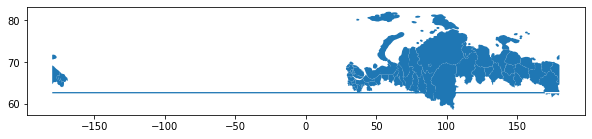

In [11]:
data.plot(figsize=(10,10))

In [14]:
all_res = []

def convert(objectid):
    obj = data[data.id == objectid]
    for _, row in obj.iterrows():
        seq = row.geometry.geoms
        polygons = []
        for polygon in seq:
            x, y = polygon.exterior.xy
            pairs = zip(x, y)
            coords = []
            for pair in pairs:
                coords.append([pair[1], pair[0]])
            polygons.append(coords)
        obj = {}
        obj['id'] = objectid
        obj['region'] = row.region
        obj['type'] = row.type
        obj['name'] = row.name
        obj['level'] = row.level
        obj['sub'] = row['sub']
        obj['people'] = row.people
        obj['sum_bad'] = row.sum_bad
        obj['percent'] = row.percent
        obj['road_density'] = row.road_density
        obj['road_demand'] = row.road_demand
        obj['id_full'] = row.id_full
        obj['count_bad'] = row.count_bad
        obj['avg_free_speed_to_limit'] = row.avg_free_speed_to_limit
        obj['sum_all'] = row.sum_all
        obj['sum_all_signal'] = row.sum_all_signal
        obj['geometry'] = polygons

        all_res.append(obj)

data = mun_obr_all_bad
objectids = data.id
for objectid in objectids:
    convert(objectid)

mun_obr_all_bad_df = pd.DataFrame(all_res)
data = mun_obr_all_bad_df
data.head(3)

,id,region,type,name,level,sub,people,sum_bad,percent,road_density,road_demand,id_full,count_bad,avg_free_speed_to_limit,sum_all,sum_all_signal,geometry
0,1,Архангельская область,Район,0,3,3,25639,454.179,22.587524,0.039698,7817,191.0,1276,0.540127,4566.956058,2010.751573,"[[[81.73228389994497, 60.657309900379154], [81..."
1,2,Архангельская область,Район,1,3,3,30762,497.027,52.266499,0.199816,258,198.0,557,0.769203,5690.231916,950.947574,"[[[64.61189679986897, 37.17080199984193], [64...."
2,3,Архангельская область,Городской округ,2,3,3,358594,22.830,1.136748,5.871852,6029,202.0,110,0.635683,2046.616862,2008.360347,"[[[64.74196969985218, 40.503267300001355], [64..."


In [15]:
data.to_csv('data/mun_obr_all_bad_lense.csv', index=False)